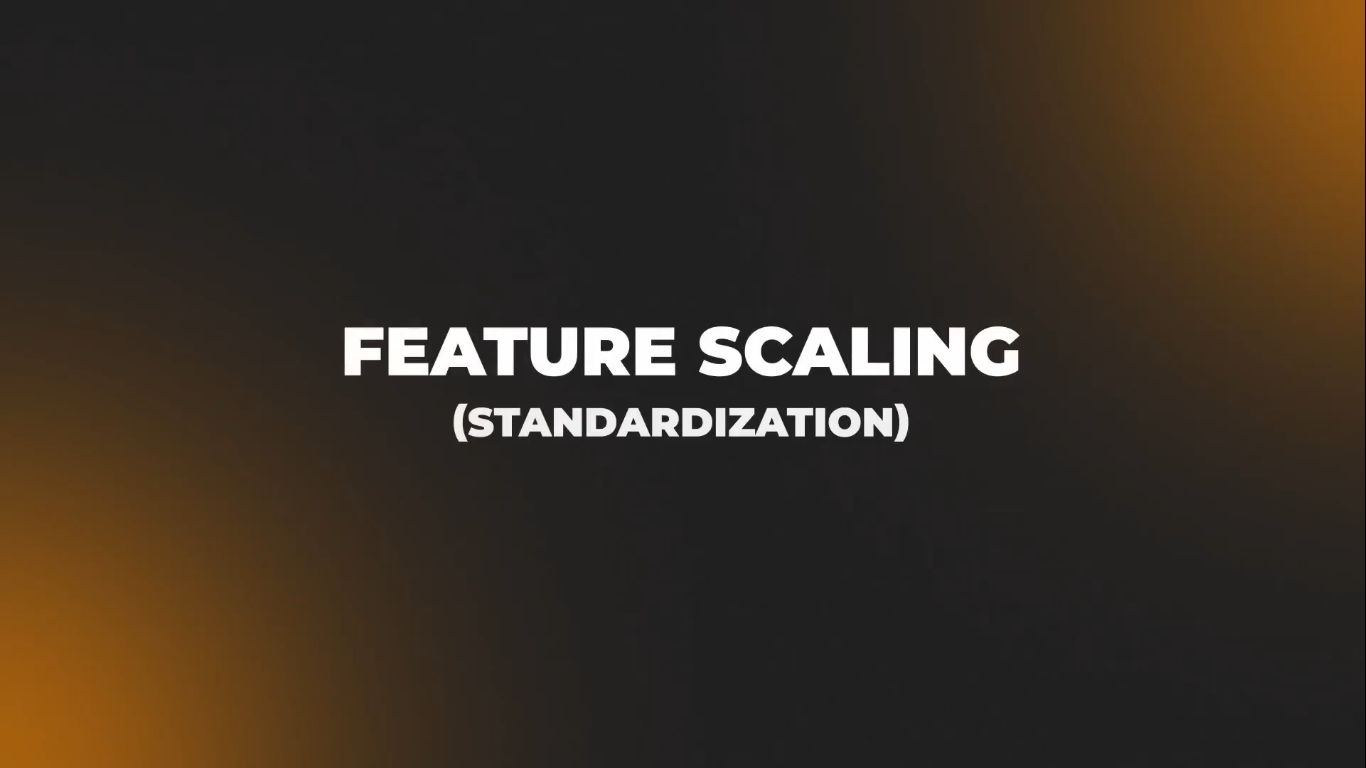

In [1]:
from IPython.display import Image, display
display(Image(filename=r"H:\Programming\Files\Machine Learning\photos\C_10.1.png"))

In [66]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
sns.set_style("darkgrid")

import warnings 
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r"H:\Programming\Files\Machine Learning\Files\Loan Dataset.csv")
df.head(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y


In [3]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [4]:
# Fill NaN Values 
for i in df.columns:
    df[i].fillna(df[i].mode()[0], inplace=True)

df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [6]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,145.465798,342.410423,0.855049
std,6109.041673,2926.248369,84.180967,64.428629,0.352339
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,125.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


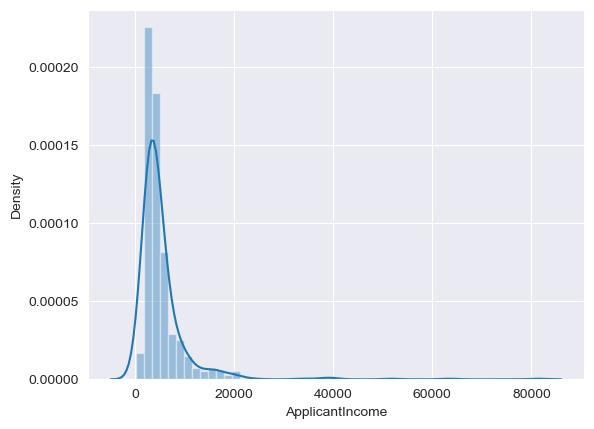

In [68]:
# Show nature of the data 
sns.distplot(df['ApplicantIncome'])
plt.show()

In [58]:
from sklearn.preprocessing import StandardScaler 
ss = StandardScaler()

ss.fit(df[['ApplicantIncome']])

StandardScaler()

In [60]:
df['ApplicantIncome_ss'] = ss.transform(df[['ApplicantIncome']])
df.head(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,ApplicantIncome_ss
0,LP001002,Male,No,0,Graduate,No,5849,0.0,120.0,360.0,1.0,Urban,Y,0.072991
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,-0.134412
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,-0.393747


In [62]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,ApplicantIncome_ss
count,614.000000,614.000000,614.000000,614.000000,614.000000,6.140000e+02
mean,5403.459283,1621.245798,145.465798,342.410423,0.855049,-4.339634e-18
std,6109.041673,2926.248369,84.180967,64.428629,0.352339,1.000815e+00
min,150.000000,0.000000,9.000000,12.000000,0.000000,-8.606493e-01
25%,2877.500000,0.000000,100.250000,360.000000,1.000000,-4.138159e-01
50%,3812.500000,1188.500000,125.000000,360.000000,1.000000,-2.606393e-01
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000,6.414426e-02
max,81000.000000,41667.000000,700.000000,480.000000,1.000000,1.238462e+01


# Using **Distplot**

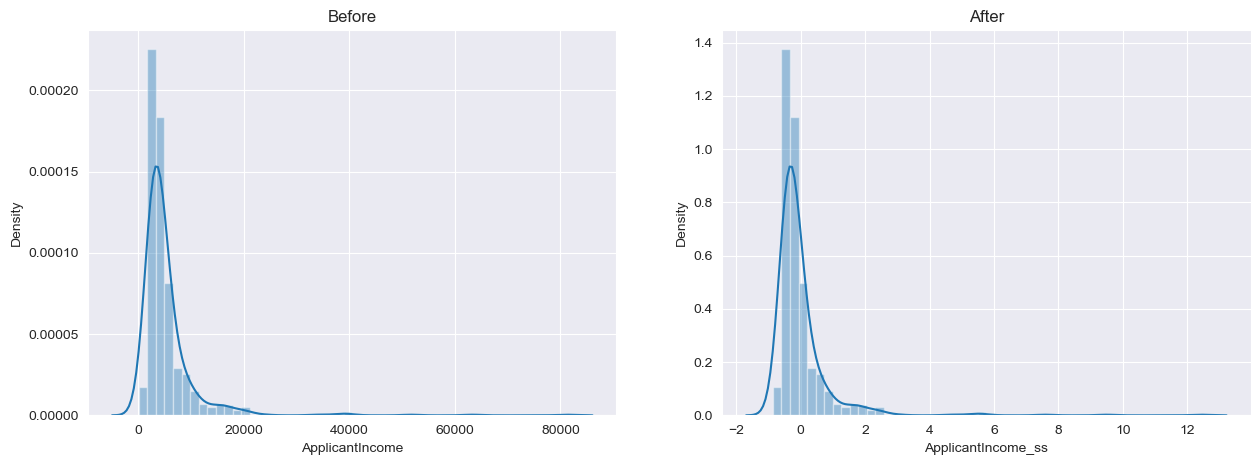

In [78]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)  # plt.subplot(row,column,position)
plt.title('Before')
sns.distplot(df['ApplicantIncome'])

plt.subplot(1,2,2)
plt.title("After")
sns.distplot(df['ApplicantIncome_ss'])

plt.show()

# Using **Histplot**

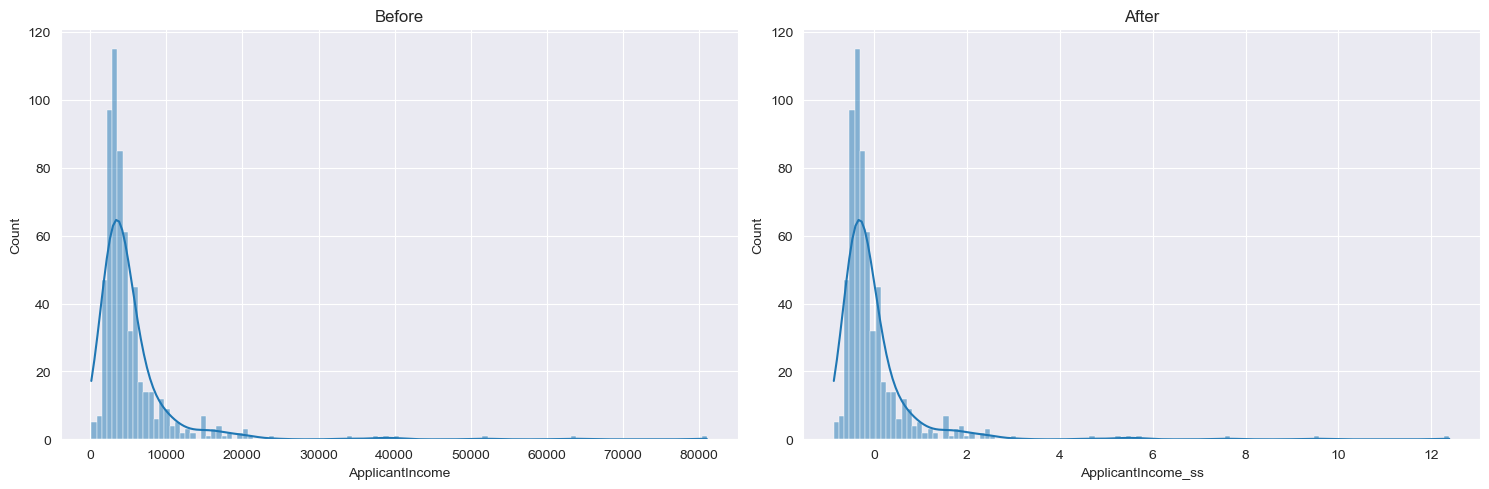

In [80]:
plt.figure(figsize=(15,5))
# First subplot: original data
plt.subplot(1, 2, 1) # plt.subplot(row,column,position)
plt.title('Before')
sns.histplot(df['ApplicantIncome'], kde=True)

# Second subplot: scaled/transformed data
plt.subplot(1, 2, 2)
plt.title('After')
sns.histplot(df['ApplicantIncome_ss'], kde=True)

# Adjust layout and display
plt.tight_layout()
plt.show()


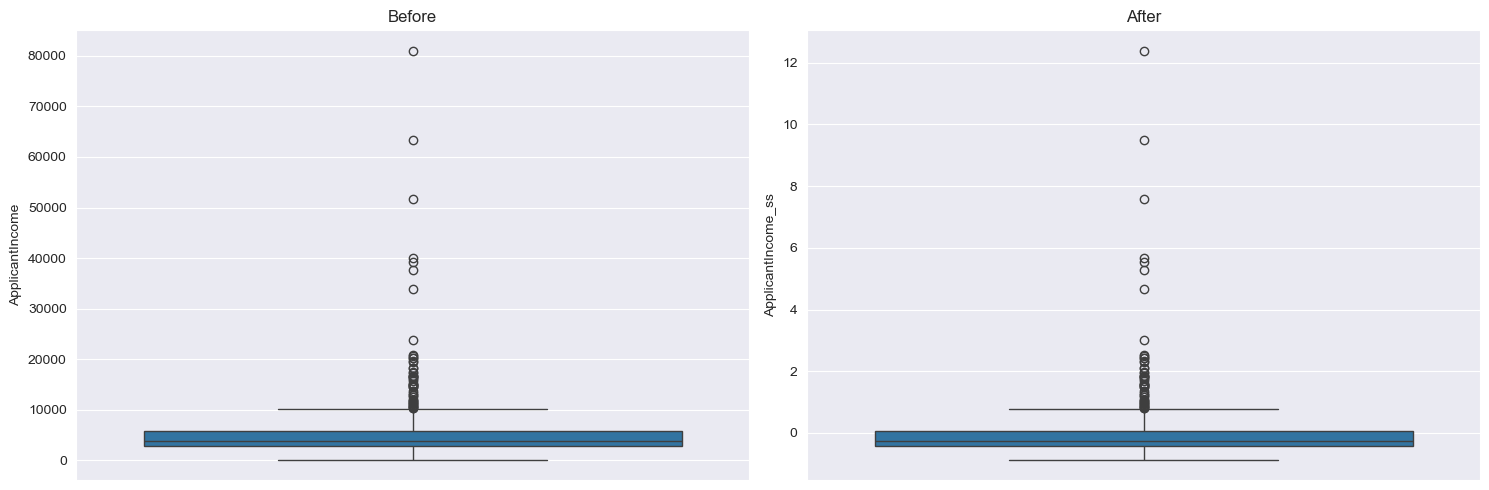

In [88]:
plt.figure(figsize=(15,5))
# First subplot: original data
plt.subplot(1, 2, 1)  # plt.subplot(row,column,position)
plt.title('Before')
sns.boxplot(df['ApplicantIncome'])

# Second subplot: scaled/transformed data
plt.subplot(1, 2, 2)
plt.title('After')
sns.boxplot(df['ApplicantIncome_ss'])

# Adjust layout and display
plt.tight_layout()
plt.show()

## We can see outliers never changed. 
